(384, 512, 3)
(196608, 3)


/anaconda3/lib/python3.6/site-packages/numpy/linalg/linalg.py:2287: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(add.reduce(s, axis=axis, keepdims=keepdims))


(384, 512, 3)


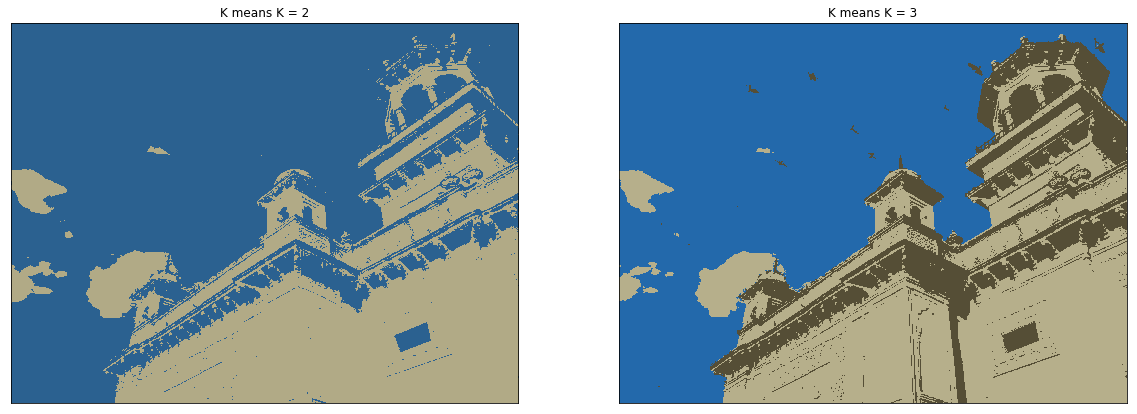

In [2]:
#1.11 K means clustering using only numpy 

import cv2
import numpy as np
from matplotlib import pyplot as plt

#read image 
home = cv2.imread('home.jpg')

#convert color
home = cv2.cvtColor(home, cv2.COLOR_BGR2RGB)

print(home.shape)
homelist = home.reshape((196608,3))
print(homelist.shape)

# convert to np.float32
homelist = np.float32(homelist)

# Function for calculating the distance between centers 
def calc_distance(currentcenter, pts):
    #numpy.linalg.norm(x= input array, ord=None, axis=None, keepdims=False)
    return np.linalg.norm(pts - currentcenter, axis=1)

# Apply clustering #

# Initialitation stage, random centers 

center1 = homelist[np.random.randint(homelist.shape[0], size=2)]

center2 = homelist[np.random.randint(homelist.shape[0], size=3)]

#vectors to store calculated distance and assignment

assign1 = np.zeros(homelist.shape[0], dtype=np.float64)
assign2 = np.zeros(homelist.shape[0], dtype=np.float64)

distances1 = np.zeros([homelist.shape[0], 2], dtype=np.float64)
distances2 = np.zeros([homelist.shape[0], 3], dtype=np.float64)

#Assignment & Update
#K=2
#10 iterations 
for i in range(10):
    # assign points to nearest centroid 
    for i, j in enumerate(center1):
        distances1[:, i] = calc_distance(j, homelist)
        
    #determine points assignment according to smallest distance 
    #numpy function for minimum distance in distance vector
    assign1 = np.argmin(distances1, axis=1)
    
    # now we update the new centers by doing mean, k=2 (we have two centers)
    for c in range(2):
        center1[c] = np.mean(homelist[assign1 == c], 0)

#same as previous, now k =3, we have 3 centers  
for j in range(10):
    for j, i in enumerate(center2):
        distances2[:, j] =calc_distance(i, homelist)
    assign2 = np.argmin(distances2, axis=1)
    for d in range(3):
        center2[d] = np.mean(homelist[assign2 == d], 0)
      
#back to integer
center1 = np.uint8(center1)
center2 = np.uint8(center2)

print(home.shape)
#reform clustered images according to original image shape (384, 512, 3)

clustered2 = center1[assign1.flatten()]
clustered2 = clustered2.reshape((384, 512, 3))

clustered3 = center2[assign2.flatten()]
clustered3 = clustered3.reshape((384, 512, 3))

#plot
plt.figure(figsize=(20,20))
plt.subplot(121)
plt.imshow(clustered2)
plt.title("K means K = 2"), plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(clustered3)
plt.title("K means K = 3"), plt.xticks([]), plt.yticks([])
plt.show()


(Text(0.5,1,'EM K=3'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

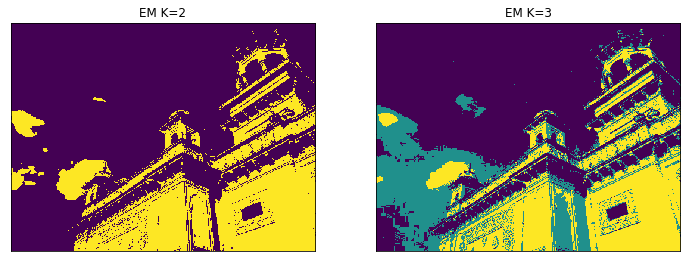

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import math

#import image
img = cv2.imread('home.jpg')
#set heigh and width params 
height, width = img.shape[:2]

#convert into intensity feature vector 
homelist = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
homelist = np.reshape(homelist, img.shape[0]*img.shape[1])


#Initialize GMM clusters 
prev_idx = 0
labels = np.zeros_like(homelist)
    #k=2
for k in range(2):
    idx = (1/2) * 255 * (k+1)
    labels[np.where((homelist >= prev_idx) & (homelist < idx))] = k
    prev_idx = idx
    
prev_idxx = 0
labels2 = np.zeros_like(homelist)
    #k=2
for k in range(3):
    idxx = (1/3) * 255 * (k+1)
    labels2[np.where((homelist >= prev_idxx) & (homelist < idxx))] = k
    prev_idxx = idxx

#function to calculate gaussian probabilities for each cluster, used in expectation step 
#takes input: (feature vector, scalar mean, scalar variance) 
#returns label associated with the vector
def __prob(data, m, v):

    c = 1 / (math.sqrt(2*math.pi) * math.sqrt(v))
    probs = c * np.exp(-((data - m)**2) / (2*v))
    return probs
         
# create function for expectation step, using probability function
#determine the probability that a component is associated with each sample, based on current GMM estimate
def __expectation(data, means, var, alpha, clusters):

        probs = np.array([__prob(data, means[k], var[k]) for k in range(clusters)]).T
        probs *= alpha
        for row in probs:
            row /= sum(row)
        labels = np.argmax(probs, axis=1)
        return labels
    
# run EM algorithm
for i in range(10):
    
    #maximization step, maximize probability of samples given current assignment of each sample to a gaussian component
    mu = []
    var = []
    alpha = []
    for k in range(2):
        
        X = homelist[np.where(labels==k)[0]]
        mu.append(np.mean(X))
        var.append(np.var(X))
        alpha.append(len(X) / len(homelist))
    
    #expectation step using expectation function, 2 cluster centers
    labels = __expectation(homelist, mu, var, alpha, 2)
    
img_label3 = np.reshape(labels, (height, width))

# run EM algorithm
for i in range(10):
    #maximization step 
    mu1 = []
    var1 = []
    alpha1 = []
    for k in range(3):
        Y = homelist[np.where(labels2==k)[0]]
        mu1.append(np.mean(Y))
        var1.append(np.var(Y))
        alpha1.append(len(Y) / len(homelist))
    
    #expectation step using expectation function, 3 cluster centers 
    labels2 = __expectation(homelist, mu1, var1, alpha1, 3)
    
img_label4 = np.reshape(labels2, (height, width))

plt.figure(figsize=(12,12))
plt.subplot(121), plt.imshow(img_label3)
plt.title('EM K=2'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_label4)
plt.title('EM K=3'), plt.xticks([]), plt.yticks([])

1.13 
K means is a variant of EM, with the assumption that clusters are spherical (i.e identical variance-covariance matricies) 
Therefore, when EM clusters are spherical, both will give the same solution. 

-- Linear geometric distribution 